In [2]:
import pandas as pd



In [3]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
df_ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [5]:
movie_ratings_count = df_ratings['movieId'].value_counts()
max_ratings_movie_id = movie_ratings_count.idxmax()


In [6]:
max_ratings_movie_id

356

In [8]:
df_movies=pd.read_csv('movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [11]:
df_movies[df_movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [20]:
df_movies[df_movies['title']=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [12]:
df_tags=pd.read_csv('tags.csv')
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [15]:
df_tags[df_tags['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [21]:
filtered = df_ratings[df_ratings['movieId']==2959]
print(filtered)

       userId  movieId  rating   timestamp
192         1     2959     5.0   964983282
458         4     2959     2.0   945078528
1134       10     2959     0.5  1455356582
1479       15     2959     2.5  1510571747
1635       16     2959     3.5  1377476874
...       ...      ...     ...         ...
95893     601     2959     5.0  1441639461
96788     603     2959     4.0   963176105
97835     606     2959     5.0  1171231517
99107     608     2959     5.0  1117336631
99699     610     2959     5.0  1479541966

[218 rows x 4 columns]


In [22]:
import matplotlib.pyplot as plt

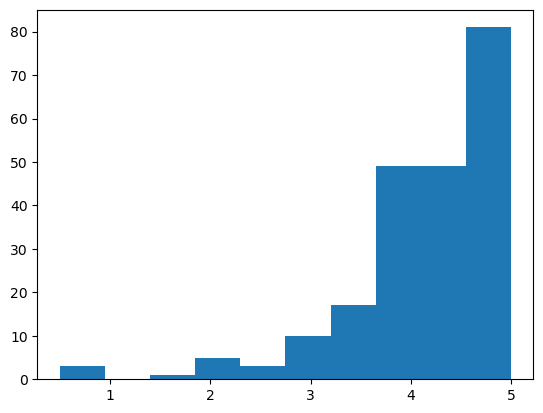

In [126]:
plt.hist(filtered['rating'])
plt.show()

In [26]:
df_mandatory_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
df_mandatory_ratings

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [28]:
result_df = pd.merge(df_movies, df_mandatory_ratings, on='movieId', how='inner')
result_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [32]:
df_ratings_morethann50=result_df[result_df['count']>50]
df_ratings_morethann50

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [124]:
mostpopularmovie_meanrating = df_ratings_morethann50.loc[df_ratings_morethann50['mean'].idxmax(), 'title']
mostpopularmovie_meanrating

'Shawshank Redemption, The (1994)'

In [34]:
sorted_df = df_ratings_morethann50.sort_values(by='count', ascending=False)
sorted_df

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [35]:
filtered_df_sf = df_ratings_morethann50[df_ratings_morethann50['genres'].str.contains('Sci-Fi')]

sorted_df = filtered_df_sf.sort_values(by='count', ascending=False)
sorted_df

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [36]:
df_links = pd.read_csv('links.csv')
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [37]:
df_mandatory2 = pd.merge(df_ratings_morethann50, df_links, on='movieId', how='inner')
df_mandatory2

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [125]:
dftr = df_mandatory2['imdbId'].astype(str).apply(len)
unique_lengths = dftr.unique()
unique_lengths

array([6, 5, 7], dtype=int64)

In [106]:
import requests
import time
from bs4 import BeautifulSoup
imdbid = '1049413'

imdbid_str = str(imdbid)
imdb_prefix = '0' if len(imdbid_str) == 6 else ('' if len(imdbid_str) == 7 else '00')
url = f'https://www.imdb.com/title/tt{imdb_prefix}{imdbid_str}/'

print(url)
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url,headers=headers)
print('yes0')
print(response.status_code)
if response.status_code==200:
    soup = BeautifulSoup(response.text, 'html.parser')
    rating_element = soup.find('span',class_='sc-bde20123-1 cMEQkK')
    print(rating_element.text)
    


https://www.imdb.com/title/tt1049413/
yes0
200
8.3


In [120]:
import requests
from bs4 import BeautifulSoup

def scrape_imdb_rating(imdbid):
    global i
    
    imdbid_str = str(imdbid)
    imdb_prefix = '0' if len(imdbid_str) == 6 else ('' if len(imdbid_str) == 7 else '00')    
    
    url = f'https://www.imdb.com/title/tt{imdb_prefix}{imdbid_str}/'
    print(url)
    
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    response = requests.get(url,headers=headers)
    print(response.status_code)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_element = soup.find('span',class_= 'sc-bde20123-1 cMEQkK')
        
        if rating_element:
            print(rating_element.text)
            i+=1
            print(i)
            return float(rating_element.text)
            
    
    return None

i=0
df_mandatory2['imdbRating'] = df_mandatory2['imdbId'].apply(scrape_imdb_rating)

https://www.imdb.com/title/tt0114709/
200
8.3
1
https://www.imdb.com/title/tt0113497/
200
7.1
2
https://www.imdb.com/title/tt0113228/
200
6.6
3
https://www.imdb.com/title/tt0113277/
200
8.3
4
https://www.imdb.com/title/tt0114319/
200
6.3
5
https://www.imdb.com/title/tt0113189/
200
7.2
6
https://www.imdb.com/title/tt0112346/
200
6.8
7
https://www.imdb.com/title/tt0112641/
200
8.2
8
https://www.imdb.com/title/tt0114388/
200
7.7
9
https://www.imdb.com/title/tt0112281/
200
6.4
10
https://www.imdb.com/title/tt0113161/
200
6.9
11
https://www.imdb.com/title/tt0113627/
200
7.5
12
https://www.imdb.com/title/tt0114746/
200
8.0
13
https://www.imdb.com/title/tt0112431/
200
6.9
14
https://www.imdb.com/title/tt0112818/
200
7.5
15
https://www.imdb.com/title/tt0112697/
200
6.9
16
https://www.imdb.com/title/tt0114369/
200
8.6
17
https://www.imdb.com/title/tt0114148/
200
6.7
18
https://www.imdb.com/title/tt0114814/
200
8.5
19
https://www.imdb.com/title/tt0113862/
200
7.3
20
https://www.imdb.com/title/tt

200
8.1
167
https://www.imdb.com/title/tt0107048/
200
8.0
168
https://www.imdb.com/title/tt0088763/
200
8.5
169
https://www.imdb.com/title/tt0061512/
200
8.1
170
https://www.imdb.com/title/tt0072431/
200
8.0
171
https://www.imdb.com/title/tt0032455/
200
7.7
172
https://www.imdb.com/title/tt0088258/
200
7.9
173
https://www.imdb.com/title/tt0097576/
200
8.2
174
https://www.imdb.com/title/tt0097351/
200
7.5
175
https://www.imdb.com/title/tt0064115/
200
8.0
176
https://www.imdb.com/title/tt0098635/
200
7.7
177
https://www.imdb.com/title/tt0117731/
200
7.6
178
https://www.imdb.com/title/tt0099423/
200
7.1
179
https://www.imdb.com/title/tt0084726/
200
7.7
180
https://www.imdb.com/title/tt0103776/
200
7.1
181
https://www.imdb.com/title/tt0077631/
200
7.2
182
https://www.imdb.com/title/tt0073195/
200
8.1
183
https://www.imdb.com/title/tt0116996/
200
6.4
184
https://www.imdb.com/title/tt0116695/
200
7.3
185
https://www.imdb.com/title/tt0093822/
200
7.3
186
https://www.imdb.com/title/tt0117571/


200
7.6
331
https://www.imdb.com/title/tt0120737/
200
8.9
332
https://www.imdb.com/title/tt0268978/
200
8.2
333
https://www.imdb.com/title/tt0268380/
200
7.5
334
https://www.imdb.com/title/tt0259446/
200
6.6
335
https://www.imdb.com/title/tt0145487/
200
7.4
336
https://www.imdb.com/title/tt0121765/
200
6.6
337
https://www.imdb.com/title/tt0258463/
200
7.8
338
https://www.imdb.com/title/tt0181689/
200
7.6
339
https://www.imdb.com/title/tt0120912/
200
6.2
340
https://www.imdb.com/title/tt0295178/
200
6.2
341
https://www.imdb.com/title/tt0286106/
200
6.8
342
https://www.imdb.com/title/tt0245429/
200
8.6
343
https://www.imdb.com/title/tt0310793/
200
8.0
344
https://www.imdb.com/title/tt0295297/
200
7.4
345
https://www.imdb.com/title/tt0167261/
200
8.8
346
https://www.imdb.com/title/tt0217505/
200
7.5
347
https://www.imdb.com/title/tt0264464/
200
8.1
348
https://www.imdb.com/title/tt0317248/
200
8.6
349
https://www.imdb.com/title/tt0290334/
200
7.4
350
https://www.imdb.com/title/tt0234215/


In [121]:
df_mandatory2

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [122]:
sorted_dfmandatory2 = df_mandatory2.sort_values(by='imdbRating', ascending=False)
sorted_dfmandatory2

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRating
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0
364,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185,4.118919,167260,122.0,9.0
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0
...,...,...,...,...,...,...,...,...
70,420,Beverly Hills Cop III (1994),Action|Comedy|Crime|Thriller,59,2.720339,109254,306.0,5.5
28,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,137,2.916058,112462,414.0,5.4
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0,5.4
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3


In [123]:
filtered_dfmandatory2 = df_mandatory2[df_mandatory2['genres'].str.contains('Sci-Fi')]

fsorted_df = filtered_dfmandatory2.sort_values(by='count', ascending=False)
fsorted_df

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRating
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,76759,11.0,8.6
80,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000,107290,329.0,8.2
96,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982,103064,280.0,8.6
140,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0,8.7
...,...,...,...,...,...,...,...,...
435,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333,1431045,293660.0,8.0
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
260,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547,120891,8487.0,4.9
107,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547,117705,2300.0,6.5
